# Visualizing Graphs

- Matplotlib
- Beyond Python:
    - Gephi
    - D3

--- 

Vizualizing networks is a complicated problem -- how do you position the nodes and edges in a way such that no nodes overlap, connected nodes are near each other, none of the labels overlap? Typically we use what is called a *layout* to plot or visualize networks. A layout is an algorithm used to position nodes and edges on a plot automatically in aesthetically and informationally satisfactory ways.

There are several different layout algorithms, but the most common is what's called *force-directed*. These layout algorithms are based off of physical repulsion and spring systems. In general, the rule for force-directed layouts are: Repel all nodes, and model connections between nodes as 'springs', with the result that more connected nodes will be closer together.

One important issue is that each layout typically has random initial conditions. Running a plot function twice will return two different plots, both following the rules of the algorithm, but differing due to the initial conditions of the layout.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline

In [88]:
GA = nx.read_gexf('../data/ga_graph.gexf')
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


## Matplotlib
Pros:
- Easy
- Some customization

Cons:
- Looks "dated" (not great for publication / productizing)
- Not interactive

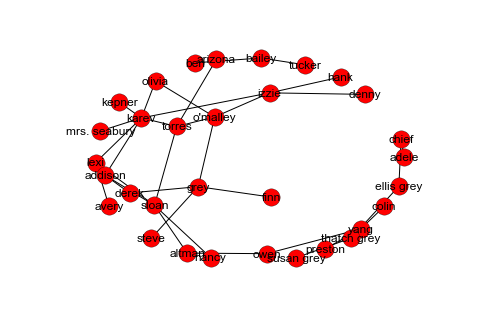

In [89]:
# Easiest Way
nx.draw(GA, with_labels=True)

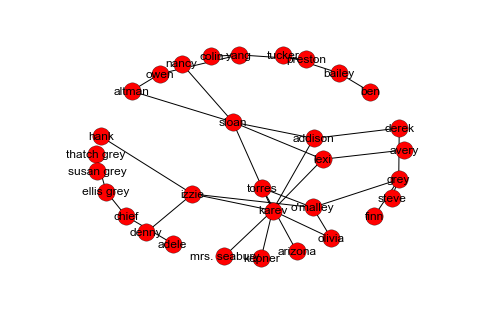

In [90]:
# Graph Layouts are random...
nx.draw(GA, with_labels=True)

## NetworkX Detailed Plotting

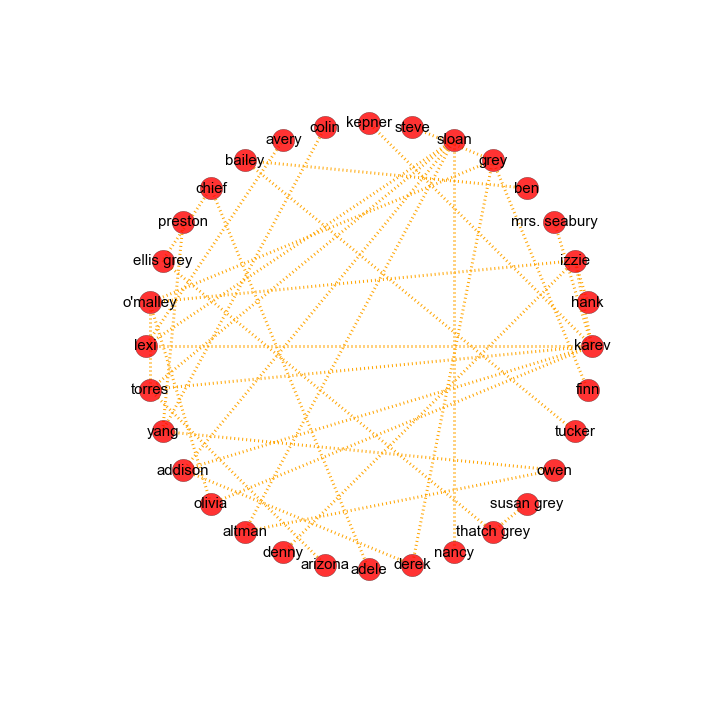

In [127]:
# Some matplotlib options
plt.figure(figsize=(12,12))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(GA)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(GA, pos=layout, width=3, style='dotted', edge_color='orange')
nx.draw_networkx_labels(GA, pos=layout, font_size=15)

plt.show() # display

## Attribute to Color Map Pattern

In [94]:
from seaborn import color_palette, set_style, palplot

In [98]:
dead_or_alive = {
    'karev' : 'alive',
    'hank' : 'alive',
    'izzie' : 'alive',
    'mrs. seabury' : 'alive',
    'ben' : 'alive',
    'grey' : 'alive',
    'sloan' : 'dead',
    'steve' : 'alive',
    'kepner' : 'alive',
    'colin' : 'alive',
    'avery' : 'alive',
    'bailey' : 'alive',
    'chief' : 'alive',
    'preston' : 'alive',
    'ellis grey' : 'dead',
    "o'malley" : 'dead',
    'lexi' : 'dead',
    'torres' : 'alive',
    'yang' : 'alive',
    'addison' : 'alive',
    'olivia' : 'alive',
    'altman' : 'alive',
    'denny' : 'dead',
    'arizona' : 'alive',
    'adele' : 'dead',
    'derek' : 'dead',
    'nancy' : 'alive',
    'thatch grey' : 'alive',
    'susan grey' : 'dead',
    'owen' : 'alive',
    'tucker' : 'alive',
    'finn' : 'alive'
}

In [99]:
nx.set_node_attributes(GA, 'status', dead_or_alive)

In [117]:
# get the set of possible statuses
status_set = list(set(dead_or_alive.values()))
num_values = len(status_set)

# generate color palette from seaborn
palette = color_palette("colorblind", num_values).as_hex()

# create a mapping of gender guess to color
color_map = dict(zip(status_set, palette))

# map the guess for each node to the color it represents
node_color = [color_map[GA.node[character]['status']] for character in GA.nodes()]

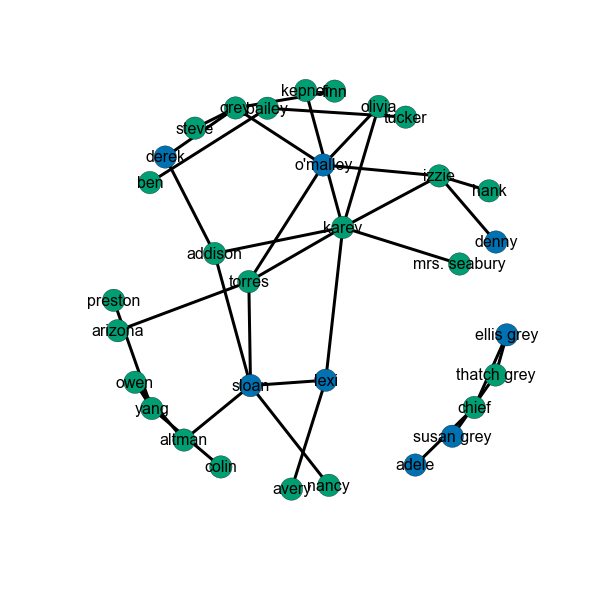

['dead', 'alive']


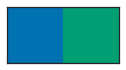

In [130]:
set_style('white')
plt.figure(figsize=(10,10))
plt.axis('off')
layout = nx.spring_layout(GA)
#nx.draw(G, pos=layout)
nx.draw_networkx_nodes(GA, layout, node_color=node_color, node_size=500)
nx.draw_networkx_labels(GA, pos=layout, font_size=16)
nx.draw_networkx_edges(GA, layout, width=3)

plt.show() # display

# legend
print(status_set)
palplot(palette)

---

## Optional: Other Options
- [Plot.ly](https://plot.ly/ipython-notebooks/network-graphs/#)
- [d3](https://bl.ocks.org/mbostock/4062045)
- [Gephi](https://gephi.org/)